In [156]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [158]:
df = pd.read_csv(r'C:\Users\achat\customer-segmentation-tutorial-in-python.zip', compression='zip')

In [159]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None)

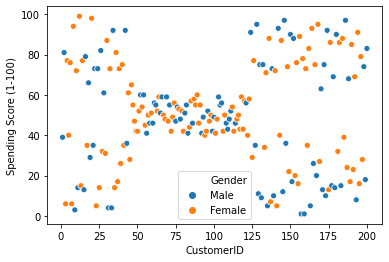

In [160]:
sns.scatterplot(x=df['CustomerID'], y=df['Spending Score (1-100)'], hue=df.Gender)

In [161]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [162]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

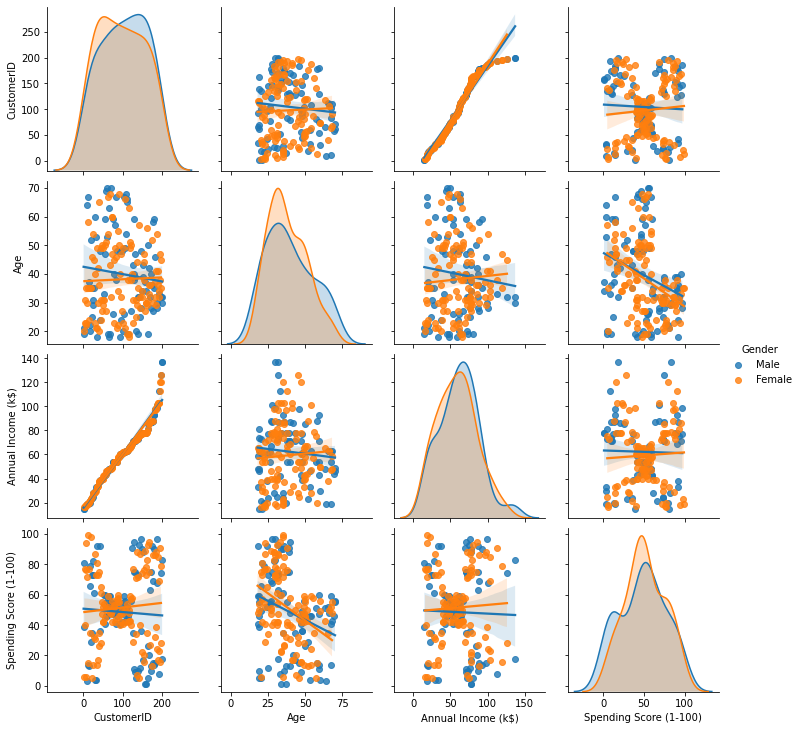

In [163]:
sns.pairplot(df, hue='Gender', kind='reg')

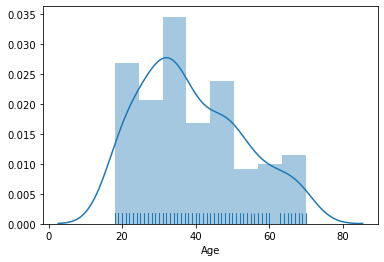

In [164]:
sns.distplot(df['Age'], rug=True)

([<matplotlib.patches.Wedge at 0x1bdb9fe8>,
 [Text(-1.080515974257694, -0.20611945413751373, 'male'),
  Text(1.1787446991902115, 0.22485758633183303, 'female')],
 [Text(-0.5893723495951058, -0.11242879316591657, '56.0%'),
  Text(0.6876010745276234, 0.13116692536023591, '44.0%')])

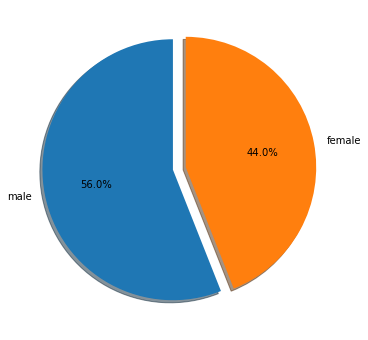

In [165]:
plt.figure(figsize=(6,6))
labels = 'male', 'female'
sizes = df['Gender'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice 
plt.pie(sizes, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%', shadow=True)

# Looking for Correlations

In [166]:
corr_matrix = df.corr(method='pearson')
print(corr_matrix['Age'].sort_values(ascending=False))

Age                       1.000000
Annual Income (k$)       -0.012398
CustomerID               -0.026763
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64


In [167]:
corr_matrix = df.corr(method='spearman')
print(corr_matrix['Age'].sort_values(ascending=False))

Age                       1.000000
Annual Income (k$)        0.019767
CustomerID                0.015249
Spending Score (1-100)   -0.344940
Name: Age, dtype: float64


# Data Preprocessing

In [168]:
from sklearn.preprocessing import OneHotEncoder
df_cat = df[['Gender']] #Convert categorical values to numericals
cat_encoder = OneHotEncoder()
df_cat_1Hot = cat_encoder.fit_transform(df_cat)
print(df_cat_1Hot)
print(df_cat_1Hot.toarray())
print(cat_encoder.categories_)

(0, 1)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (175, 0)	1.0
  (176, 1)	1.0
  (177, 1)	1.0
  (178, 1)	1.0
  (179, 1)	1.0
  (180, 0)	1.0
  (181, 0)	1.0
  (182, 1)	1.0
  (183, 0)	1.0
  (184, 0)	1.0
  (185, 1)	1.0
  (186, 0)	1.0
  (187, 1)	1.0
  (188, 0)	1.0
  (189, 0)	1.0
  (190, 0)	1.0
  (191, 0)	1.0
  (192, 1)	1.0
  (193, 0)	1.0
  (194, 0)	1.0
  (195, 0)	1.0
  (196, 0)	1.0
  (197, 1)	1.0
  (198, 1)	1.0
  (199, 1)	1.0
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [

In [169]:
df['Gender'] = df_cat_1Hot.toarray()

In [170]:
print(df.head())

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1     0.0   19                  15                      39
1           2     0.0   21                  15                      81
2           3     1.0   20                  16                       6
3           4     1.0   23                  16                      77
4           5     1.0   31                  17                      40


For the **Predictor** Variables

In [171]:
# first we drop the 'CustomerID' Column
df = df.drop(['CustomerID'], 1) # Or not ???              
from sklearn.preprocessing import  StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)']])

In [172]:
X.shape

(200, 3)

For the **Target** Variable

In [173]:
y = std_scaler.fit_transform(df[['Spending Score (1-100)']])

In [174]:
y.shape

(200, 1)

# Split the data to train and test set accordingly

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# K-Means Clustering

In [176]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [177]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 3, 2, 3, 3, 3, 2, 4, 3, 1, 2, 1, 2, 1, 3, 1, 1, 4, 2, 2, 1, 4,
       2, 2, 4, 3, 1, 2, 2, 2, 1, 4, 2, 4, 3, 2, 1, 4, 1, 2, 3, 1, 2, 0,
       0, 2, 2, 4, 1, 0, 0, 4, 2, 0, 1, 4, 0, 2, 1, 4, 1, 0, 2, 1, 1, 1,
       1, 0, 0, 4, 0, 0, 2, 2, 2, 2, 4, 0, 0, 4, 0, 0, 4, 4, 1, 4, 1, 4,
       0, 0, 4, 0, 0, 4, 4, 0, 2, 4, 0, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 0,
       0, 0, 4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0,
       1, 4, 1, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 4])

In [178]:
y_pred is kmeans.labels_

True

In [179]:
kmeans.cluster_centers_

array([[ 0.88640526, -0.37821045,  0.79392413],
       [-1.12815215,  1.36044178, -0.24300382],
       [ 0.88640526,  1.02816337, -0.41205021],
       [ 0.28203804, -0.8217286 , -1.19794753],
       [-1.12815215, -0.56336851,  0.6614338 ]])

In [180]:
kmeans.inertia_

176.12057117543372

In [181]:
kmeans.score(X_test)

-28.612749003320864

We cannot simply take the value of **k** that minimizes the inertia, since it keeps getting lower as we increase **k**


In [182]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'Inertia')

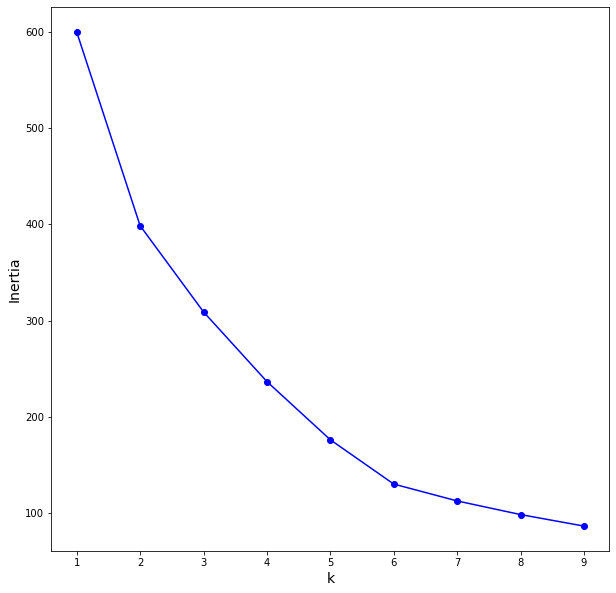

In [183]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

In [184]:
from sklearn.metrics import silhouette_score

In [185]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [186]:
silhouette_scores

[0.3626095092342616,
 0.35563742990321406,
 0.3507728434300026,
 0.39680688871010267,
 0.42794400304837266,
 0.41774595386550345,
 0.3992035857977519,
 0.40850890749071966]

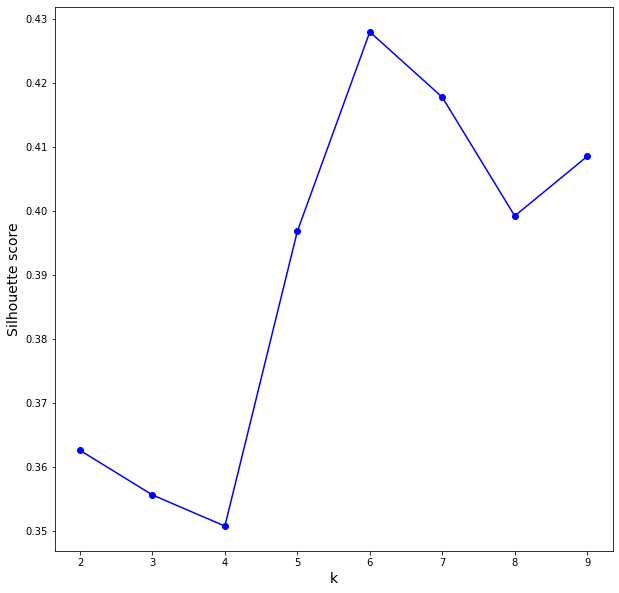

In [187]:
plt.figure(figsize=(10, 10))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

The optimal number of Clusters is **k=6**

Now we **fit** the K-Means clustering model to the dataset and then **predict** in which **cluster** each **element** belongs to.

In [188]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred_best = kmeans.fit_predict(X)

In [189]:
y_pred_best is kmeans.labels_

True

# Cluster Visualization for K-means

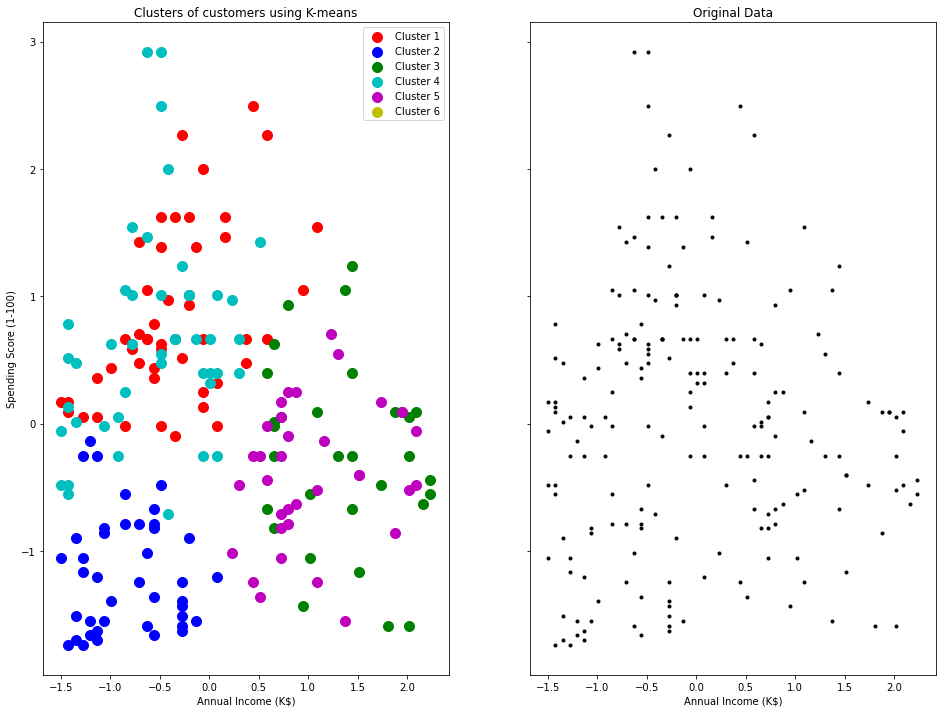

In [190]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.scatter(X[y_pred_best == 0, 1], X[y_pred_best == 0, 2], s = 100, c = 'r', label = 'Cluster 1')
plt.scatter(X[y_pred_best == 1, 1], X[y_pred_best == 1, 2], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(X[y_pred_best == 2, 1], X[y_pred_best == 2, 2], s = 100, c = 'g', label = 'Cluster 3')
plt.scatter(X[y_pred_best == 3, 1], X[y_pred_best == 3, 2], s = 100, c = 'c', label = 'Cluster 4')
plt.scatter(X[y_pred_best == 4, 1], X[y_pred_best == 4, 2], s = 100, c = 'm', label = 'Cluster 5')
plt.scatter(X[y_pred_best == 5, 1], X[y_pred_best == 5, 2], s = 100, c = 'y', label = 'Cluster 6')

plt.title('Clusters of customers using K-means')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 1], X[:, 2], c="k", marker=".")
plt.xlabel('Annual Income (K$)')
plt.tick_params(labelleft=False)
plt.title('Original Data')
plt.show()

# Hierarchical Clustering

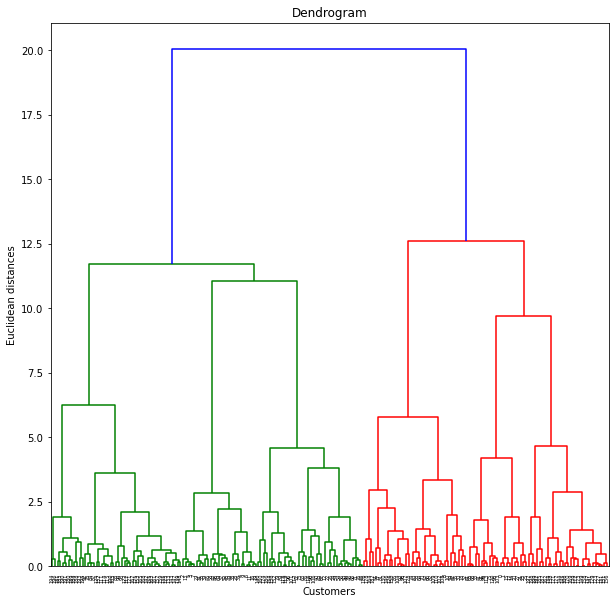

In [191]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The optimal **number of clusters** is be **6**

Now we train the algorithm for **6** clusters

In [192]:
from sklearn.cluster import AgglomerativeClustering
h_clust = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_h_clust = h_clust.fit_predict(X)

# Cluster Visualization for Hierarchical Clustering

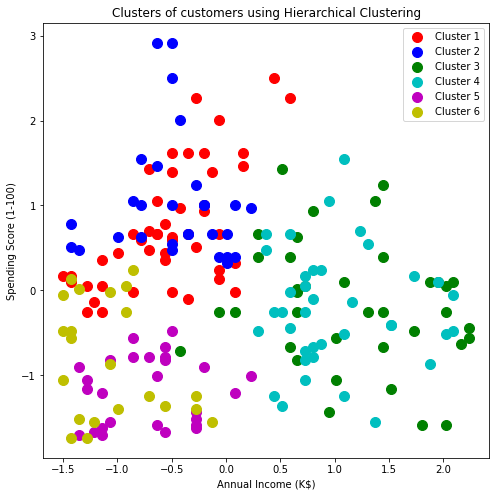

In [193]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_h_clust == 0, 1], X[y_h_clust == 0, 2], s = 100, c = 'r', label = 'Cluster 1')
plt.scatter(X[y_h_clust == 1, 1], X[y_h_clust == 1, 2], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(X[y_h_clust == 2, 1], X[y_h_clust == 2, 2], s = 100, c = 'g', label = 'Cluster 3')
plt.scatter(X[y_h_clust == 3, 1], X[y_h_clust == 3, 2], s = 100, c = 'c', label = 'Cluster 4')
plt.scatter(X[y_h_clust == 4, 1], X[y_h_clust == 4, 2], s = 100, c = 'm', label = 'Cluster 5')
plt.scatter(X[y_h_clust == 5, 1], X[y_h_clust == 5, 2], s = 100, c = 'y', label = 'Cluster 6')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Segmentation using Logistic Regression

Convert **numerical** data into **categories**

In [194]:
bins = [0, 35, 50, 75, np.inf]
cat_names = ['Low_spend', 'Low_med_spend', 'Med_spend', 'High_spend']

In [195]:
df['Spending_Score_cat'] = pd.cut(df['Spending Score (1-100)'], bins, labels=cat_names)

In [196]:
df.dtypes

Gender                     float64
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Spending_Score_cat        category
dtype: object

In [197]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending_Score_cat
0,0.0,19,15,39,Low_med_spend
1,0.0,21,15,81,High_spend
2,1.0,20,16,6,Low_spend
3,1.0,23,16,77,High_spend
4,1.0,31,17,40,Low_med_spend


Scaling the data 

In [198]:
X_new = std_scaler.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)']])

In [199]:
X_new.shape

(200, 3)

Convert 'Spending Score categories' to numerical data 

In [200]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y_new = label_enc.fit_transform(df['Spending_Score_cat'])

Scale the target variable 

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_new = scaler.fit_transform(y_new.reshape(-1,1))

In [202]:
y_new.shape

(200, 1)

In [203]:
from sklearn import utils
utils.multiclass.type_of_target(y_new)

'continuous'

In [204]:
y_new = y_new.astype('int')

In [205]:
utils.multiclass.type_of_target(y_new)

'binary'

Split the data to Training and Testing sets respectively 

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

Using Logistic Reggression as Classifier 

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
l_reg = LogisticRegression(C=0.1, solver='newton-cg')
l_reg.fit(X_train,y_train.ravel())
print(l_reg)

LogisticRegression(C=0.1, solver='newton-cg')


In [208]:
y_pred = l_reg.predict(X_test)

In [209]:
print(classification_report(y_test,y_pred, zero_division=1))

precision    recall  f1-score   support

           0       0.65      1.00      0.79        26
           1       1.00      0.00      0.00        14

    accuracy                           0.65        40
   macro avg       0.82      0.50      0.39        40
weighted avg       0.77      0.65      0.51        40



In [210]:
from sklearn.metrics import jaccard_score
print('Jaccard Similarity Score : ',round(jaccard_score(y_test,y_pred, average='weighted')*100,2),'%')

Jaccard Similarity Score :  42.25 %


In [211]:
from sklearn import metrics
print('Train Accuracy: ',metrics.accuracy_score(y_train, l_reg.predict(X_train))*100,'%')

Train Accuracy:  71.875 %


In [212]:
l_reg.predict_proba(X_test)

array([[0.70572107, 0.29427893],
       [0.66523475, 0.33476525],
       [0.65980396, 0.34019604],
       [0.71950048, 0.28049952],
       [0.70284859, 0.29715141],
       [0.74529761, 0.25470239],
       [0.72461448, 0.27538552],
       [0.72586251, 0.27413749],
       [0.75421725, 0.24578275],
       [0.71900349, 0.28099651],
       [0.72042232, 0.27957768],
       [0.73401034, 0.26598966],
       [0.75717689, 0.24282311],
       [0.733674  , 0.266326  ],
       [0.76490468, 0.23509532],
       [0.73169465, 0.26830535],
       [0.71344433, 0.28655567],
       [0.74809804, 0.25190196],
       [0.68226149, 0.31773851],
       [0.69564859, 0.30435141],
       [0.74839246, 0.25160754],
       [0.69684338, 0.30315662],
       [0.75166338, 0.24833662],
       [0.73298008, 0.26701992],
       [0.69605091, 0.30394909],
       [0.67263448, 0.32736552],
       [0.73441621, 0.26558379],
       [0.71075095, 0.28924905],
       [0.74551807, 0.25448193],
       [0.74948065, 0.25051935],
       [0.

In [213]:
z = zip(l_reg.classes_, l_reg.predict_proba(X_test)) 

In [214]:
list(z)

[(0, array([0.70572107, 0.29427893])), (1, array([0.66523475, 0.33476525]))]